In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pylab as plt
import glob
import os
import shutil
from pprint import pprint

In [3]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath
import icewave.gps.gps as gps
import icewave.gps.garmin as garmin

Please install garmin package


In [36]:
date = '2024_0211'
year,day = date.split('_')

base = '/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/'
folder = base+'Data/'+year+'/'+day+'/GPS/'
norme_folder = base + 'Nomenclature/'

filelist = glob.glob(folder+'*.gpx')
print(filelist)
filegpx = filelist[0]

base = '/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/'
date = '2024_0211'
datesave=date.replace('_','/')
savefolder = base + datesave + '/GPS/' 

import gpxpy

gpx_file = open(filegpx, 'r')
gpx = gpxpy.parse(gpx_file)
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            print('Point at ({0},{1}) -> {2}'.format(point.latitude, point.longitude, point.elevation))

for waypoint in gpx.waypoints:
    print('waypoint {0}, {1} -> ({2},{3})'.format(waypoint.name, waypoint.time.ctime(), waypoint.latitude, waypoint.longitude))

['/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0211/GPS/1000_Waypoints_2024-02-11.gpx']
waypoint Sag240102, Sun Feb 11 14:00:11 2024 -> (48.354159,-70.41197)
waypoint Sag240103, Sun Feb 11 14:08:30 2024 -> (48.351689,-70.375057)
waypoint Sag240104, Sun Feb 11 14:13:12 2024 -> (48.347114,-70.355861)
waypoint Sag240105, Sun Feb 11 17:22:43 2024 -> (48.256069,-70.034441)
waypoint Sag240106, Sun Feb 11 17:28:04 2024 -> (48.255746,-70.044663)
waypoint Sag240107, Sun Feb 11 17:34:00 2024 -> (48.254961,-70.063102)
waypoint Sag240108, Sun Feb 11 17:59:26 2024 -> (48.253948,-70.090416)
waypoint Sag240109, Sun Feb 11 18:28:10 2024 -> (48.253644,-70.091281)
waypoint Sag240110, Sun Feb 11 18:36:19 2024 -> (48.253513,-70.09116)
waypoint Sag240111, Sun Feb 11 18:37:59 2024 -> (48.253107,-70.09112)
waypoint Sag240112, Sun Feb 11 18:41:05 2024 -> (48.253457,-70.091761)
waypoint Sag240113, Sun Feb 11 18:43:01 2024 -> (48.253475,-70.091463)
waypoint Sag240114, Sun Feb 11 18:5

In [37]:
np.asarray(gpx.waypoints)

array([GPXWaypoint(48.354159, -70.41197, elevation=27.651859, time=datetime.datetime(2024, 2, 11, 14, 0, 11, tzinfo=SimpleTZ("Z")), name='Sag240102', symbol='Flag, Blue'),
       GPXWaypoint(48.351689, -70.375057, elevation=11.319143, time=datetime.datetime(2024, 2, 11, 14, 8, 30, tzinfo=SimpleTZ("Z")), name='Sag240103', symbol='Flag, Blue'),
       GPXWaypoint(48.347114, -70.355861, elevation=13.281659, time=datetime.datetime(2024, 2, 11, 14, 13, 12, tzinfo=SimpleTZ("Z")), name='Sag240104', symbol='Flag, Blue'),
       GPXWaypoint(48.256069, -70.034441, elevation=-7.929217, time=datetime.datetime(2024, 2, 11, 17, 22, 43, tzinfo=SimpleTZ("Z")), name='Sag240105', symbol='Flag, Blue'),
       GPXWaypoint(48.255746, -70.044663, elevation=-8.689998, time=datetime.datetime(2024, 2, 11, 17, 28, 4, tzinfo=SimpleTZ("Z")), name='Sag240106', symbol='Flag, Blue'),
       GPXWaypoint(48.254961, -70.063102, elevation=17.09655, time=datetime.datetime(2024, 2, 11, 17, 34, tzinfo=SimpleTZ("Z")), name=

In [38]:
def represent_waypoints(gpx,imin,imax,table=None):
    if table is None:
        table = read_table()
        
    indices = select(gpx,imin,imax)
    Long,Lat = [],[]
    waypoints = np.asarray(gpx.waypoints)[indices]
    for waypoint in waypoints:
        Long.append(waypoint.longitude)
        Lat.append(waypoint.latitude)

    BBox = gps.box_data(Long,Lat,scale=0.7)
    ext = gps.extent(BBox)
    t = gps.tmp_connect()
    fig, ax = plt.subplots(figsize=(10, 10), dpi=200)
    ax,figs = gps.display_map(ext,t,title=date,ax=ax,width=600)

    X,Y = [],[]
    for waypoint in waypoints:
        number = int(waypoint.name[-3:])
        x,y = gps.project(waypoint.longitude,waypoint.latitude)
        X.append(x)
        Y.append(y)
        display(x,y,ax=ax,name=waypoint.name,table=table)
    #savefolder = os.path.dirname(filename)+'/'
    return ax,figs

def represent_table(table,gpx,imin,imax):
    indices = select(gpx,imin,imax)
    Long,Lat = [],[]
    waypoints = np.asarray(gpx.waypoints)[indices]
    for waypoint in waypoints:
        Long.append(waypoint.longitude)
        Lat.append(waypoint.latitude)

    BBox = gps.box_data(Long,Lat,scale=0.7)
    ext = gps.extent(BBox)
    t = gps.tmp_connect()
    fig, ax = plt.subplots(figsize=(10, 10), dpi=200)
    ax,figs = gps.display_map(ext,t,title=date,ax=ax,width=600)

    X,Y = [],[]
    numbers = np.asarray([int(waypoint.name[-3:]) for waypoint in gpx.waypoints])
    for (number,elem) in table:
        if number in numbers:
            ind = np.where(np.asarray(numbers)==number)[0][0]
            waypoint = gpx.waypoints[ind]
            x,y = gps.project(waypoint.longitude,waypoint.latitude)
            X.append(x)
            Y.append(y)
            name = elem
            if '_' in elem:
                tag,num = elem.split('_')
                label = norme[tag]
            else:
                label = norme[elem]
            ax.plot(x,y,label)
            
            name = name.replace('_','_{')
            name = '$'+name+'}$'
            plt.text(x,y-10**(-7),name)
    print(filename)
    savefolder = os.path.dirname(filename)+'/'
    return ax,figs
    
def display(x,y,ax=None,name='',table=None):
    if table==None:
        label = 'bo'
    else:
        number = int(name[-3:])
        numbers = [tab[0] for tab in table]
        if number in numbers:
            ind = np.where(np.asarray(numbers)==number)[0][0]
            key,elem = table[ind]
            if '_' in elem:
                name = elem
                tag,num = elem.split('_')
                label = norme[tag]
            else:
                label = norme[elem]
            #print(number,table[number],label)
        elif number>max(numbers):
            label='bo'
        else:
            label='bo'
        ax.plot(x,y,label)
        
    name = name.replace('_','_{')
    name = '$'+name+'}$'
    plt.text(x,y-10**(-7),name)
    

def select(gpx,imin,imax):
    indices = []
    for i,waypoint in enumerate(gpx.waypoints):
        number = int(waypoint.name[-3:])
        #print(number)
        if number>=imin and number<=imax:#True:#int(waypoint.name)>155 and int(waypoint.name)<250:
            indices.append(i)
    return indices

def read_table():
    print(glob.glob(folder+'*.txt'))
    filename = glob.glob(folder+'*.txt')[0]
    with open(filename,'r') as f:
        out = f.read()
    
    lines = out.split('\n')
    table = [line.split('\t') for line in lines]
    dtable = [(int(tab[0]),tab[1]) for tab in table]
    return dtable

def read_norme(folder):
    print(glob.glob(folder+'*.txt'))
    filename = glob.glob(folder+'*.txt')[0]
    
    with open(filename,'r') as f:
        out = f.read()
    
    lines = out.split('\n')
    table = np.asarray([line.split('\t') for line in lines])

    dtable = {tab[0]:tab[1] for tab in table}
    pprint(dtable)
    return dtable

In [44]:
global norme
norme = read_norme(norme_folder)
table = read_table()

['/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Nomenclature/Nomenclature_GPS.txt']
{'B': 'mo',
 'Canot': 'yo',
 'D': 'kp',
 'G': 'g^',
 'H': 'bv',
 'R': 'bs',
 'S': 'bo',
 'T': 'rs',
 'Tomo': 'g>',
 'borne': 'ks',
 'depart': 'g*',
 'fin': 'g*',
 'name': 'label',
 'plot': 'rp'}
['/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0211/GPS/Map_Table_0211_Fracture.txt']


In [40]:
print(table)
print(norme)

[(109, 'depart'), (110, 'plot_01'), (111, 'plot_03'), (112, 'plot_02'), (113, 'T_11'), (114, 'B_03'), (114, 'T_13'), (115, 'plot_04'), (118, 'B_02'), (117, 'B_04'), (116, 'borne_00'), (118, 'T_12'), (119, 'S_401'), (120, 'S_402'), (121, 'S_403'), (122, 'S_404'), (123, 'S_405'), (124, 'S_406'), (125, 'S_407'), (126, 'S_408'), (127, 'S_409'), (128, 'S_410'), (129, 'S_411'), (130, 'S_412'), (131, 'S_413'), (132, 'S_414'), (133, 'S_415'), (134, 'S_416'), (135, 'S_417'), (136, 'B_05'), (137, 'B_07'), (138, 'T_09'), (139, 'Tomo_211'), (140, 'Tomo_212'), (141, 'Tomo_204'), (142, 'Tomo_206'), (143, 'Tomo_216'), (144, 'Tomo_207'), (145, 'Tomo_201'), (146, 'Tomo_203'), (147, 'B_01'), (148, 'Canot_01'), (149, 'Canot_02')]
{'name': 'label', 'depart': 'g*', 'fin': 'g*', 'G': 'g^', 'B': 'mo', 'T': 'rs', 'D': 'kp', 'H': 'bv', 'S': 'bo', 'Tomo': 'g>', 'borne': 'ks', 'plot': 'rp', 'R': 'bs', 'Canot': 'yo'}


In [41]:
savefolder

'/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0211/GPS/'

['/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/2024/0211/GPS/Map_Table_0211_Fracture.txt']
Extent((0.3052971527777777,0.34655760038575845)->(0.3053074,0.34656784760798076) projected as normal)


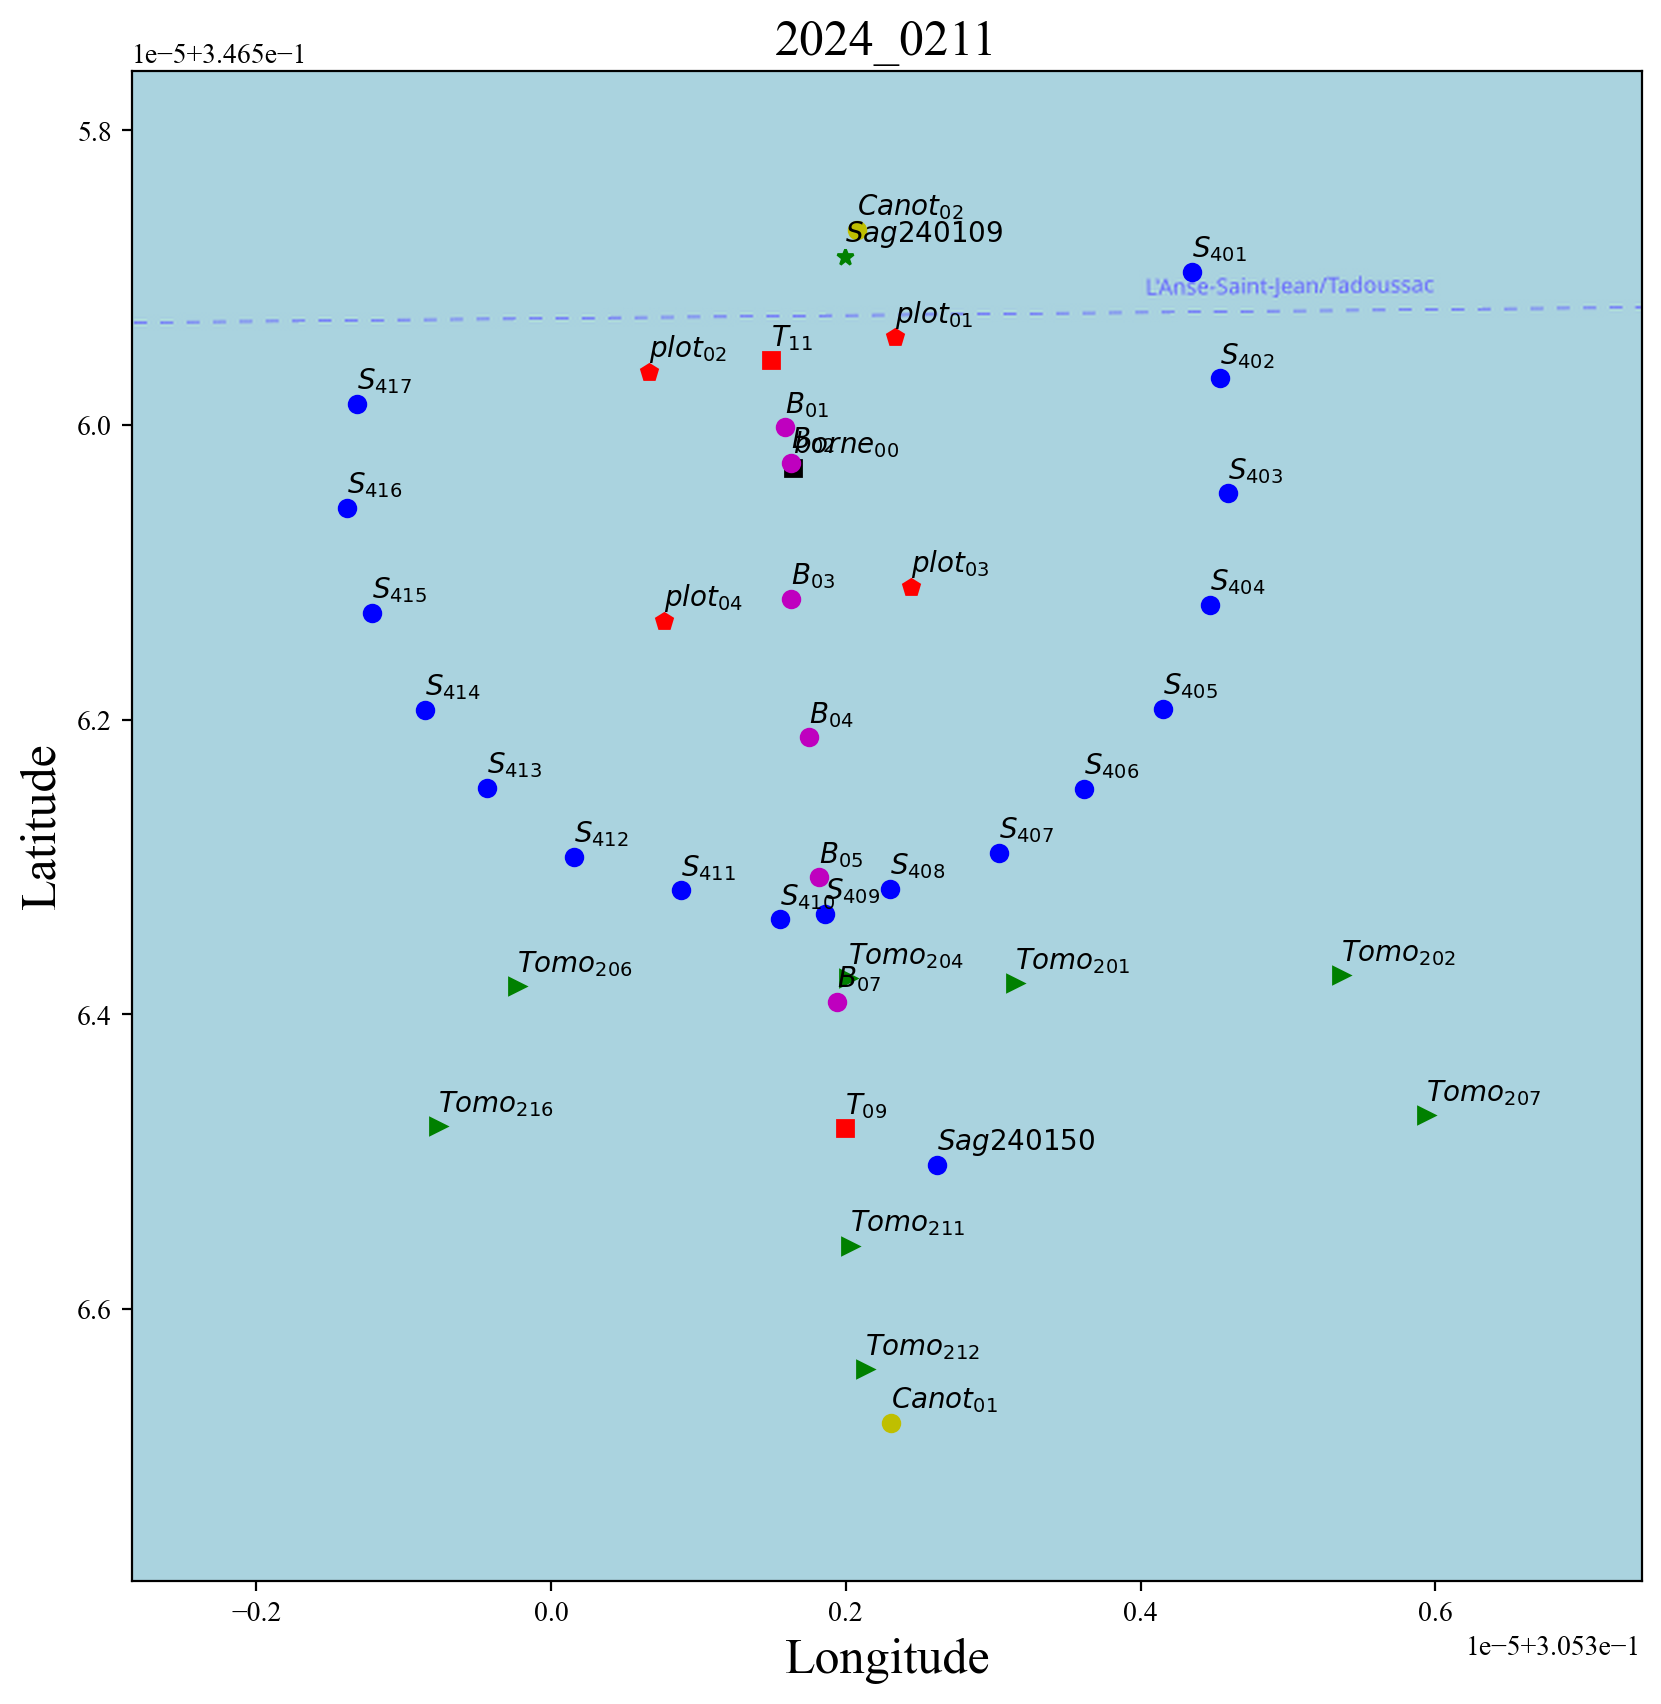

In [45]:
ax,figs = represent_waypoints(gpx,109,150)

graphes.save_figs(figs,savedir=savefolder,prefix='Carte_Generale',suffix='labeled',frmt='pdf',overwrite=True)

In [261]:
gpx.waypoints[0]

GPXWaypoint(48.365506, -70.697383, elevation=1.292548, time=datetime.datetime(2024, 2, 10, 12, 21, 46, tzinfo=SimpleTZ("Z")), name='Sag240063', symbol='Flag, Blue')

[['#', 'X', 'Y', 'Z'], ['G_101', 0, 0, 0], ['G_102', 3, 0, 0], ['G_103', 6, 0, 0], ['G_104', 9, 0, 0], ['G_105', 12, 0, 0], ['G_106', 15, 0, 0], ['G_107', 18, 0, 0], ['G_108', 21, 0, 0], ['G_109', 24, 0, 0], ['G_110', 27, 0, 0], ['G_111', 30, 0, 0], ['G_112', 33, 0, 0], ['G_113', 36, 0, 0], ['G_114', 39, 0, 0], ['G_115', 42, 0, 0], ['G_116', 45, 0, 0], ['S_101', -5, 0, 0], ['S_102', -8, 0, 0], ['S_103', -11, 0, 0], ['S_104', 50, 0, 0], ['S_105', 53, 0, 0], ['S_106', 56, 0, 0]]
[['#', 'X', 'Y', 'Z'], ['G_201', 0, 0, 0], ['G_202', 0, -3, 0], ['G_203', 0, -6, 0], ['G_204', 0, -9, 0], ['G_205', 0, -12, 0], ['G_206', 0, -15, 0], ['G_207', 0, -18, 0], ['G_208', 0, -21, 0], ['G_209', 0, -24, 0], ['G_210', 0, -27, 0], ['G_211', 0, -30, 0], ['G_212', 0, -33, 0], ['G_213', 0, -36, 0], ['G_214', 0, -39, 0], ['G_215', 0, -42, 0], ['G_216', 0, -45, 0], ['S_201', 0, 5, 0], ['S_202', 0, 8, 0], ['S_203', 0, 11, 0], ['S_204', 0, -50, 0], ['S_205', 0, -53, 0], ['S_206', 0, -56, 0]]
[['#', 'X', 'Y', 'Z']

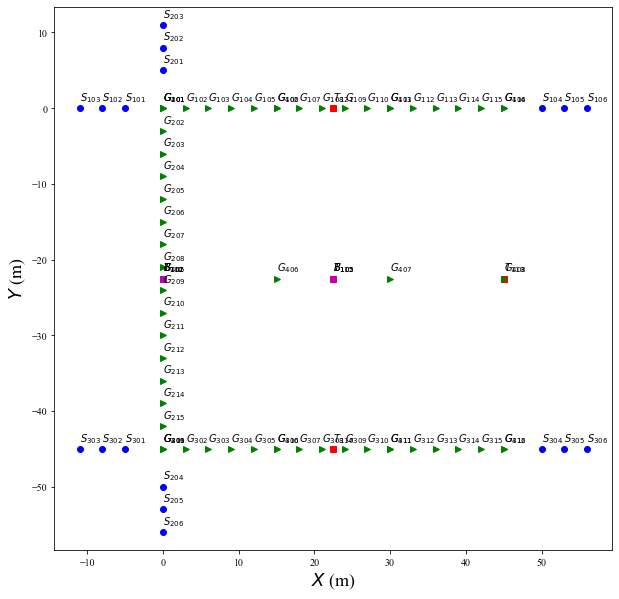

In [56]:
import icewave.geometry.experiment_2024_0211 as experiment

base = '/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/Data/'
date = '2024_0211'
datesave=date.replace('_','/')

figs,geom = experiment.Sag24_0211()
graphes.save_figs(figs,savedir=savefolder,prefix='geometry_'+date,suffix='_general',overwrite=True)
#print(figs)

In [287]:
geom

[['#', 'X', 'Y', 'Z'],
 ['G_01', 0, 0, 0],
 ['G_02', 3, 0, 0],
 ['G_03', 6, 0, 0],
 ['G_04', 9, 0, 0],
 ['G_05', 12, 0, 0],
 ['G_06', 15, 0, 0],
 ['G_07', 18, 0, 0],
 ['G_08', 21, 0, 0],
 ['G_09', 24, 0, 0],
 ['G_10', 27, 0, 0],
 ['G_11', 30, 0, 0],
 ['G_12', 33, 0, 0],
 ['G_13', 36, 0, 0],
 ['G_14', 39, 0, 0],
 ['G_15', 42, 0, 0],
 ['G_16', 45, 0, 0],
 ['S_101', -5, 0, 0],
 ['S_102', -8, 0, 0],
 ['S_103', -11, 0, 0],
 ['S_104', 50, 0, 0],
 ['S_105', 53, 0, 0],
 ['S_106', 56, 0, 0],
 ['G_01', 0, 0, 0],
 ['G_02', 0, -3, 0],
 ['G_03', 0, -6, 0],
 ['G_04', 0, -9, 0],
 ['G_05', 0, -12, 0],
 ['G_06', 0, -15, 0],
 ['G_07', 0, -18, 0],
 ['G_08', 0, -21, 0],
 ['G_09', 0, -24, 0],
 ['G_10', 0, -27, 0],
 ['G_11', 0, -30, 0],
 ['G_12', 0, -33, 0],
 ['G_13', 0, -36, 0],
 ['G_14', 0, -39, 0],
 ['G_15', 0, -42, 0],
 ['G_16', 0, -45, 0],
 ['S_201', 0, 5, 0],
 ['S_202', 0, 8, 0],
 ['S_203', 0, 11, 0],
 ['S_204', 0, -50, 0],
 ['S_205', 0, -53, 0],
 ['S_206', 0, -56, 0],
 ['G_01', 0, -45, 0],
 ['G_02', 

In [293]:
import icewave.geometry.save as geom_save

filename = savefolder + 'Geom_table.txt'

#pprint(geom)

geom_save.save(geom,filename)